# Ultra Diffuse Galaxies Data Analysis

### Imports

In [2]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
from IPython.display import clear_output

from cube_cut import cut_cube
from run_barycentric import barycentric_correction
from spectra_stacker_gen2 import spectra_stack
from ppxf_kinematics import ppxf_kinematics

warnings.filterwarnings('ignore')

### step 1: clean spectra

['/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/DDO190/kb200217_00064_ocubes.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/DDO190/kb200217_00065_ocubes.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/DDO190/kb200217_00066_ocubes.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/DDO190/kb200217_00067_ocubes.fits']
/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/DDO190/kb200217_00064_ocubes.fits 4777.25
/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/DDO190/kb200217_00065_ocubes.fits 4777.25
/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/DDO190/kb200217_00066_ocubes.fits 4777.25
/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/DDO190/kb200217_00067_ocubes.

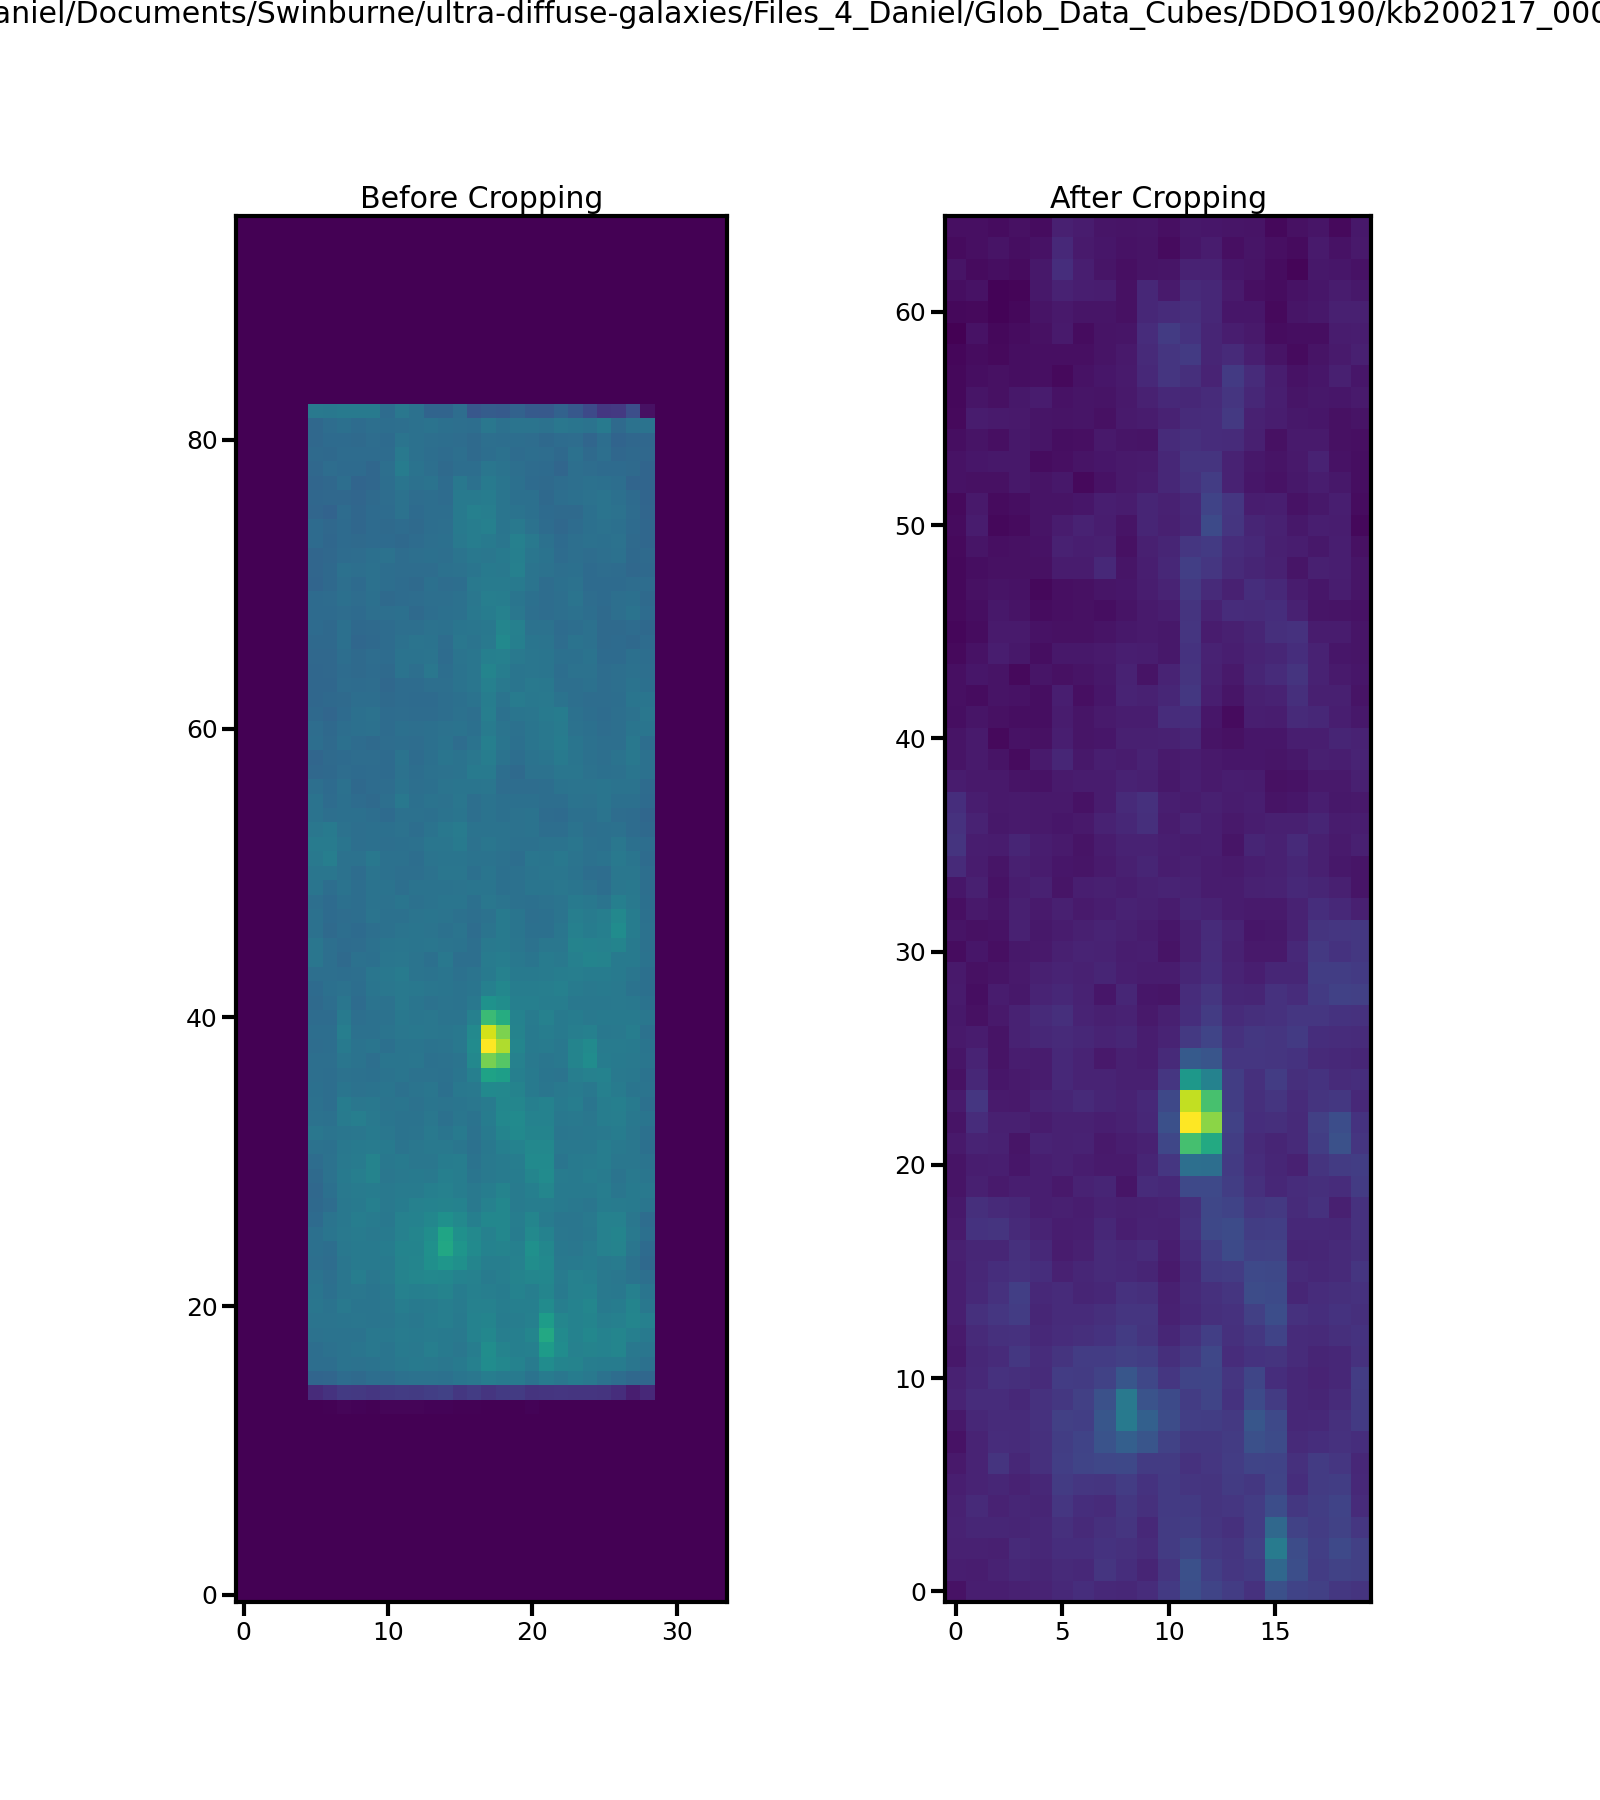

Files Written out


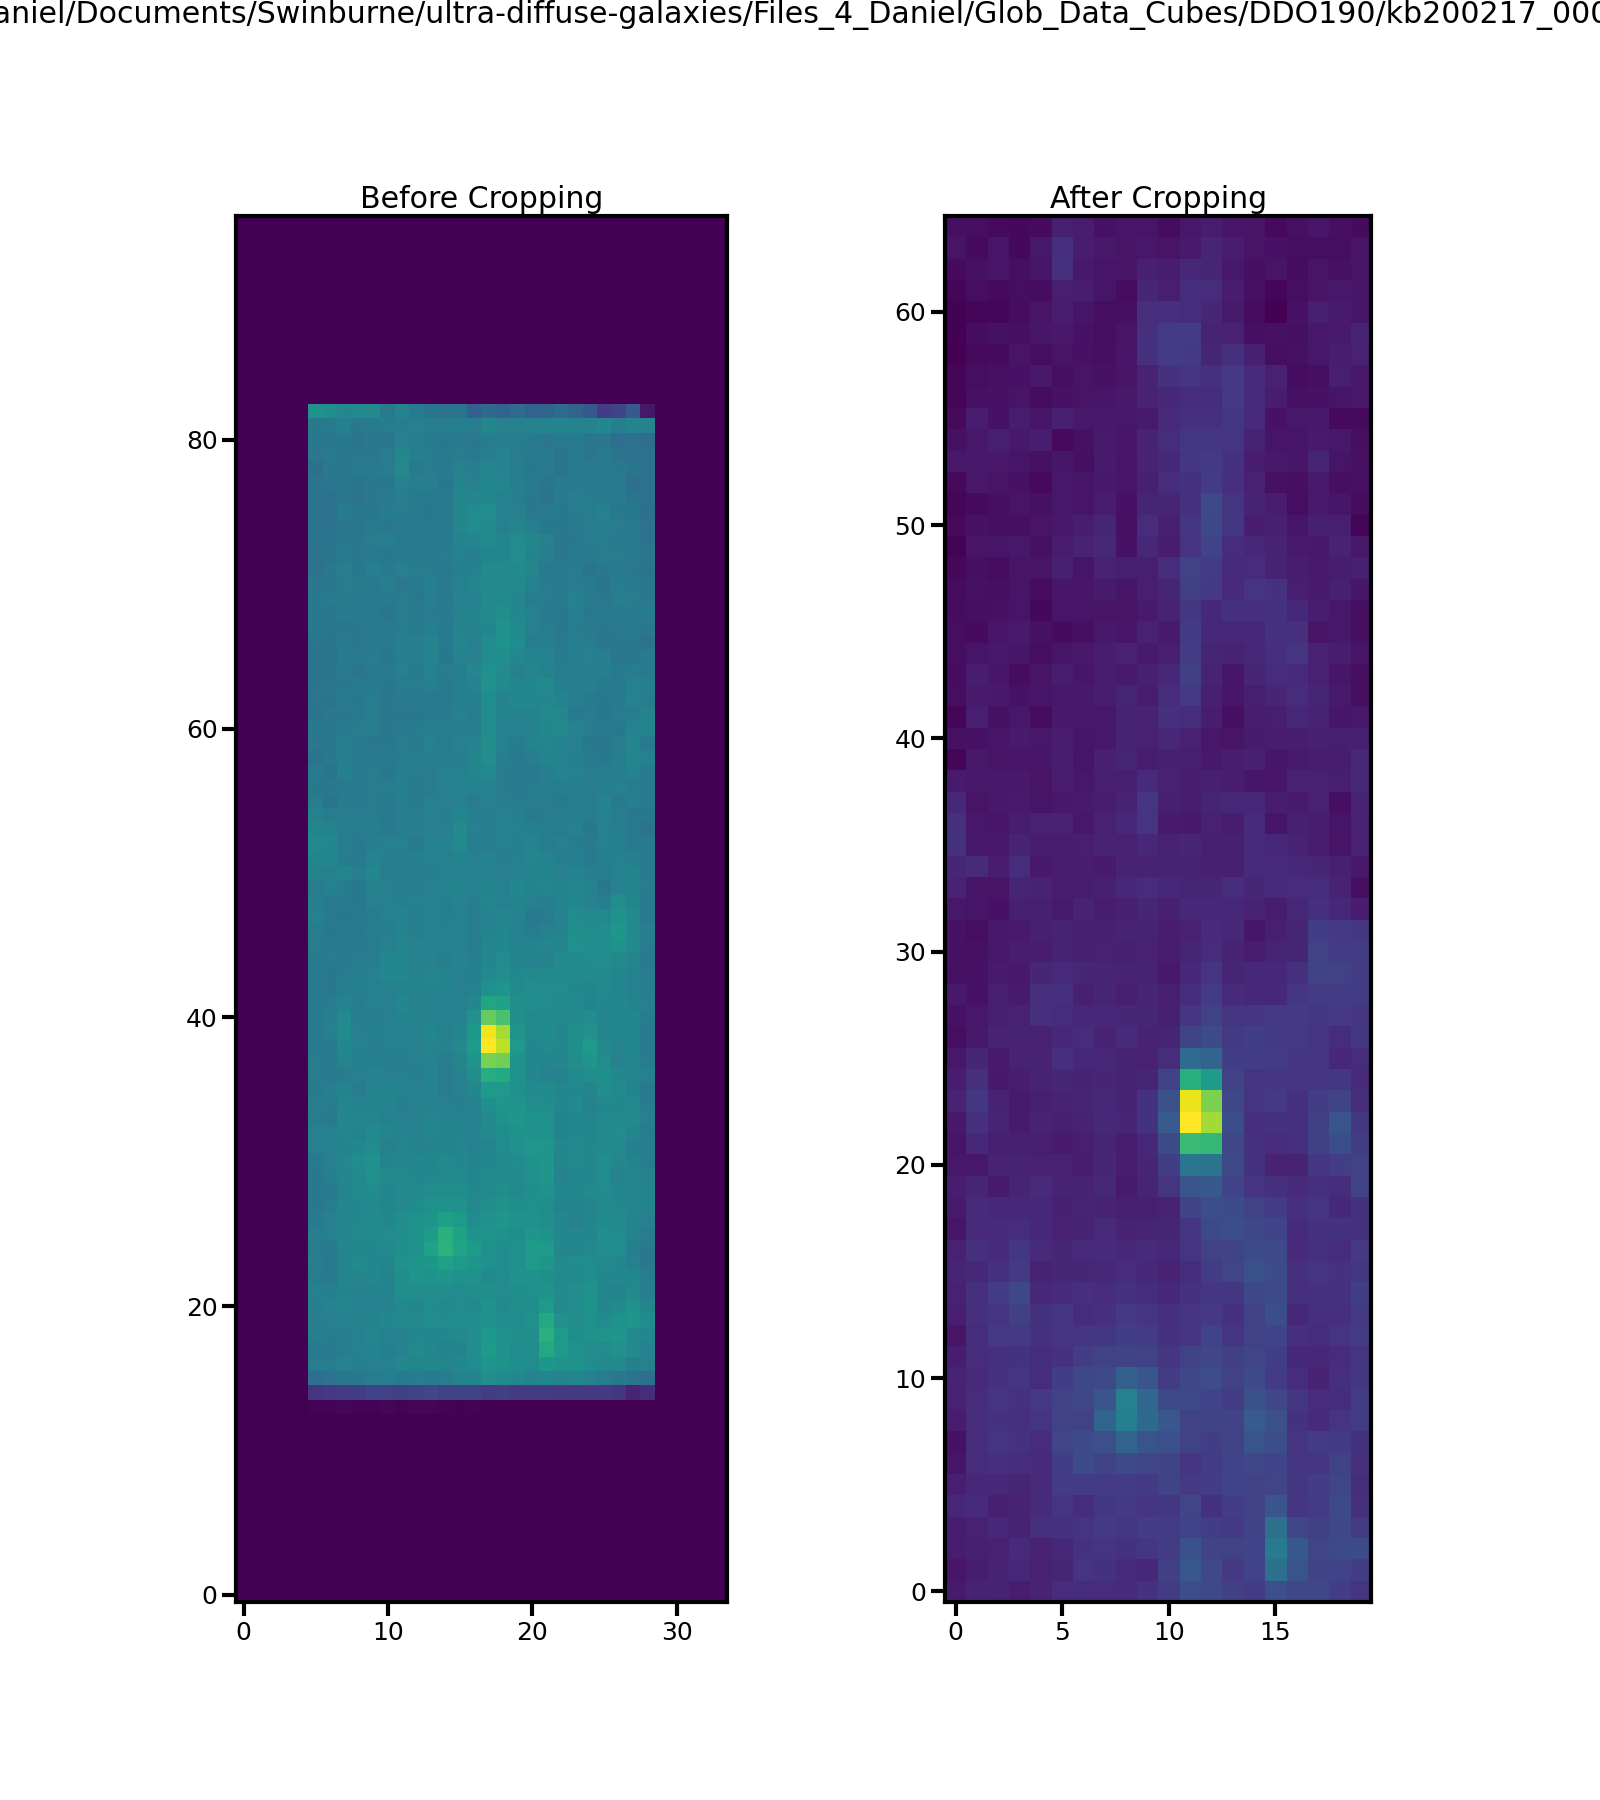

Files Written out


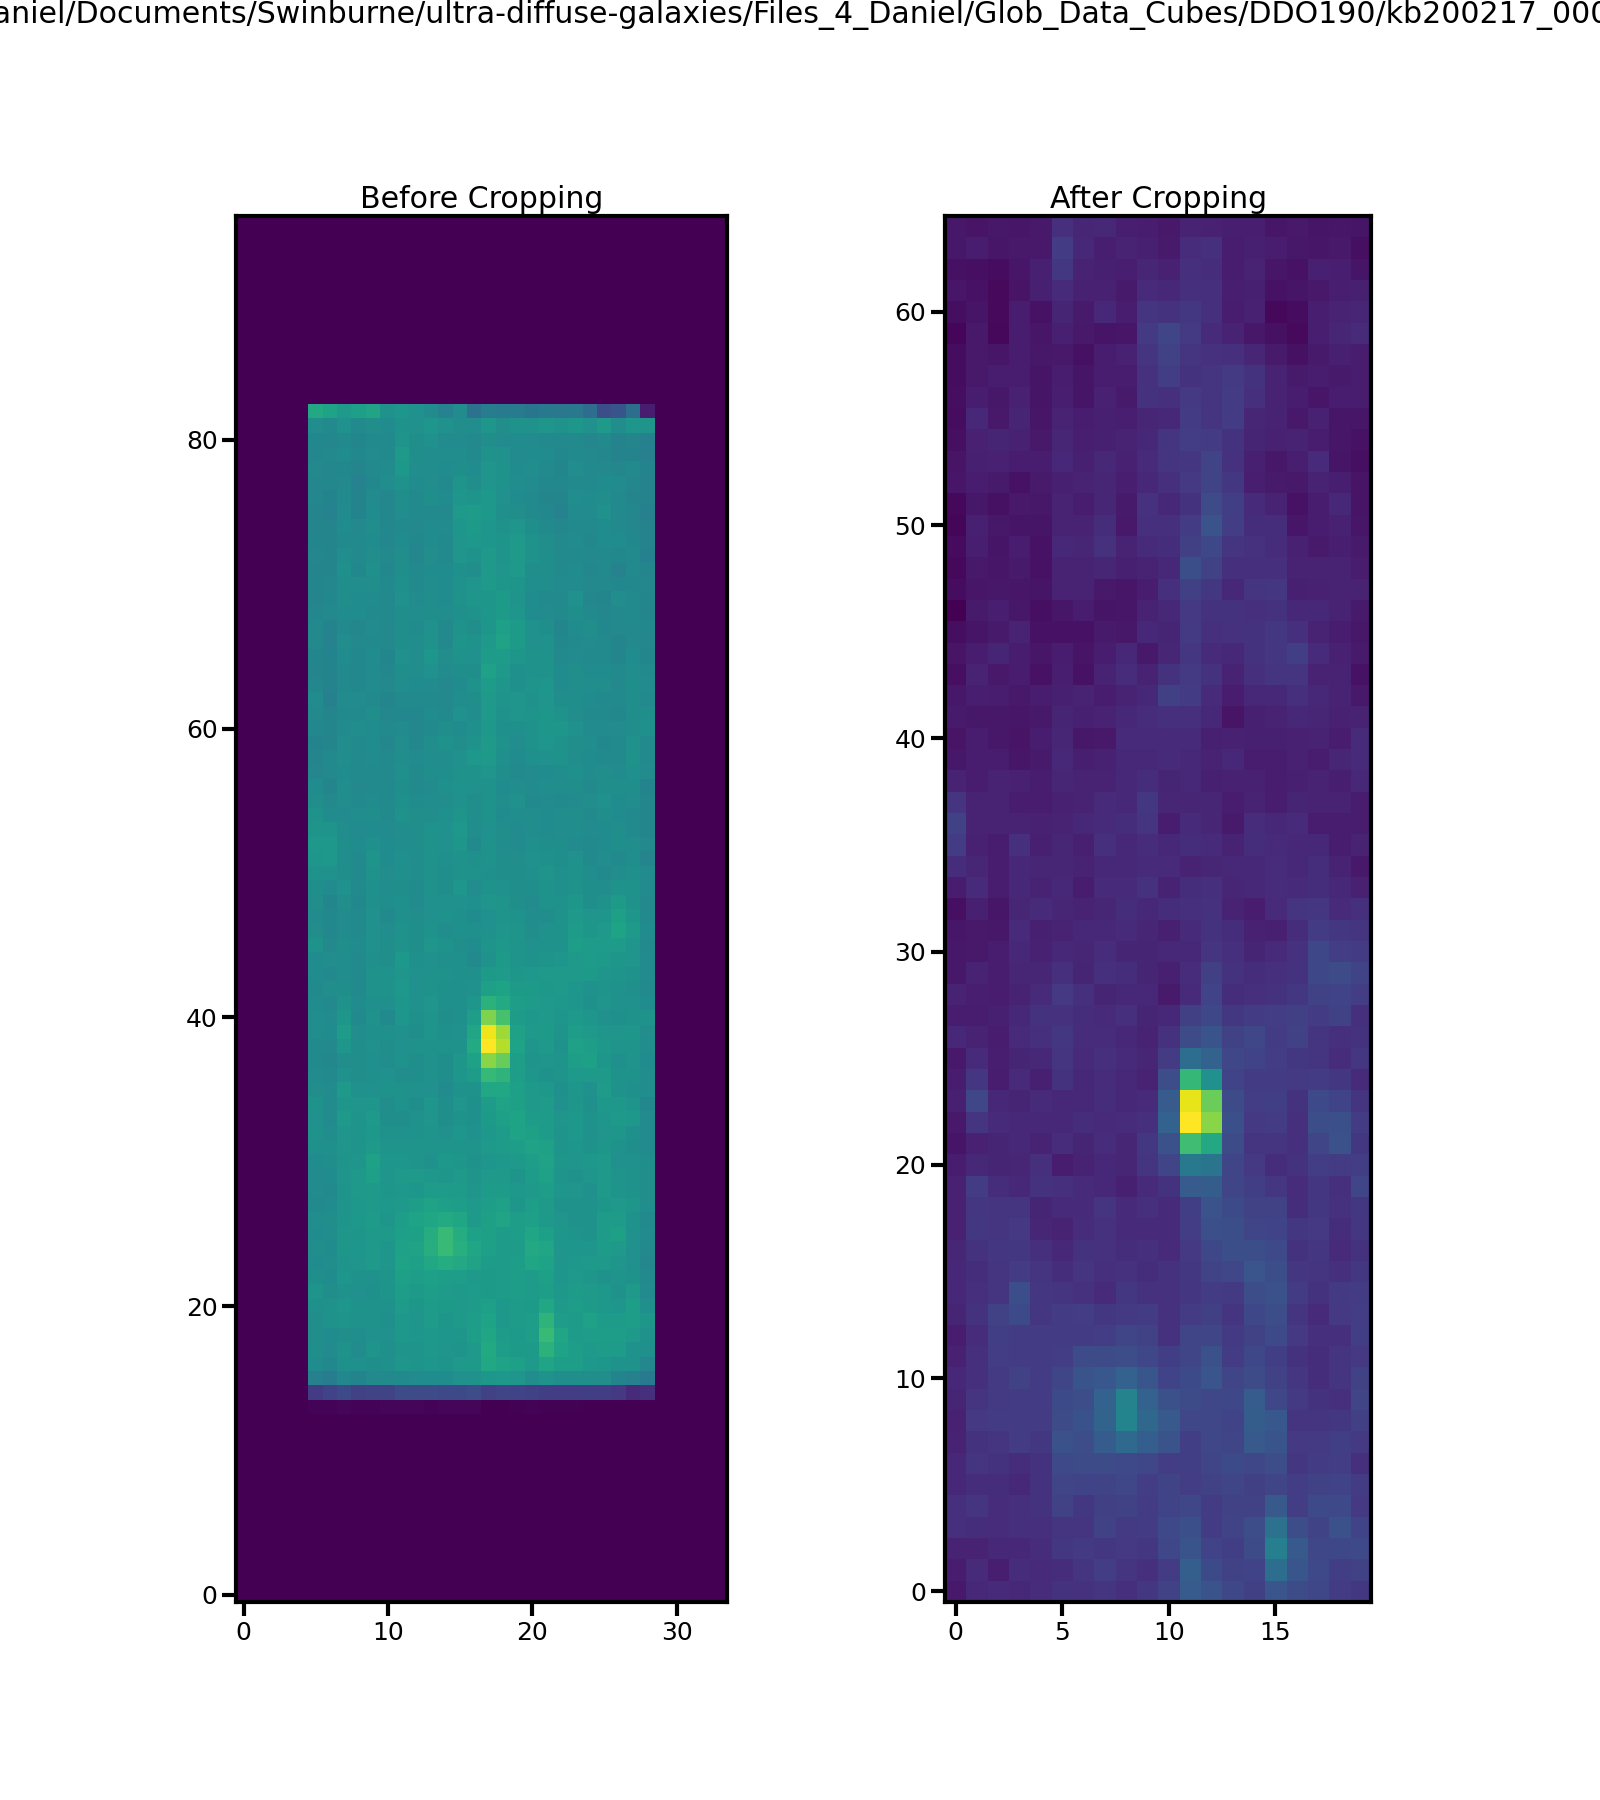

Files Written out


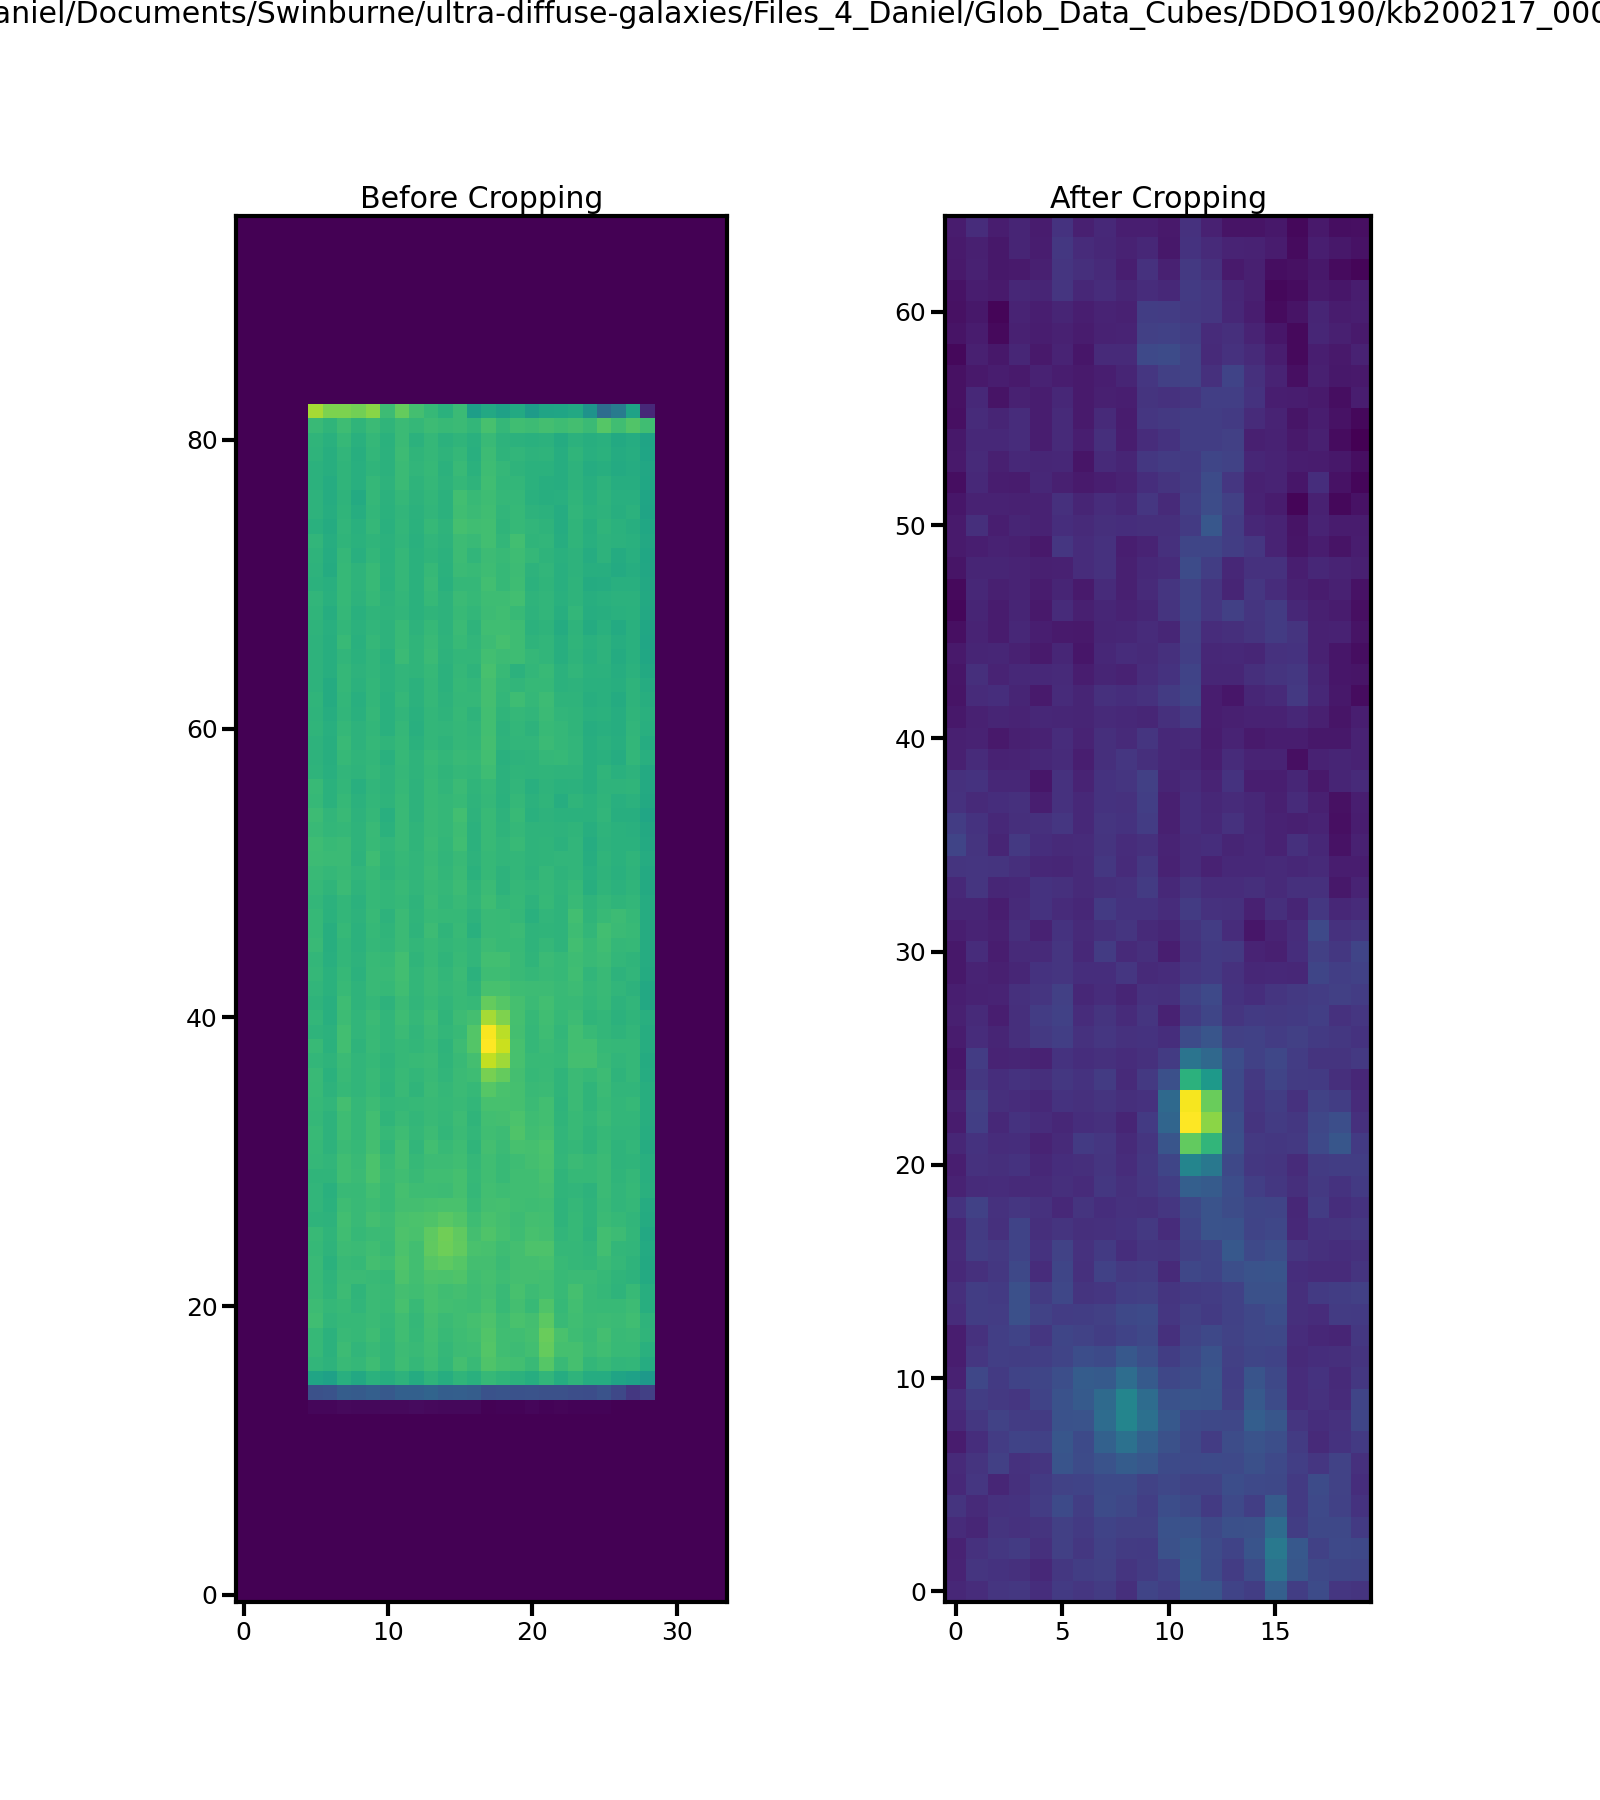

Files Written out
Code Competed Successfully in, 8.13 seconds


In [3]:
""" User inputs """
s1_file_directory = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/DDO190/' # path to directory containing spectra
s1_file_keyword = '*kb*ocubes*' # keyword to find files in directory
x_low = 7 # lowest and highest xvalue of the spaxel to be INCLUDED in the rectangle
x_high = 26
y_low = 17 # lowest and highest yvalue of the spaxel to be INCLUDED in the rectangle
y_high = 81

cut_cube(s1_file_directory, s1_file_keyword, x_low, x_high, y_low, y_high)

### step 1.5: extract spectra
open qfitsview and create `.fits` file for all objects in the cut files 

### step 2: barycentric correction

In [11]:
""" User inputs """
s2_file_directory = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/DDO190/obj1/' # path to directory containing spectra
s2_file_keyword = '6*' # keyword to find files in directory
corrections = 'auto' # 'manual' or 'automatic'

if corrections == 'manual':
    bary_corr = np.array([0]) # Manual barycentric correction in km/s. One number for each file!
    # INPUT MANUAL ABOVE ^^^^^^
else:
    bary_corr = barycentric_correction(s2_file_directory, s2_file_keyword)
    bary_corr = np.array(bary_corr)
    if np.all(bary_corr > 0):
        bary_corr = -bary_corr
    
print(f'Barycentric correction: {bary_corr} km/s')
print(f'Delta correction: {np.diff(bary_corr)} km/s')
plt.close()

The Barycentric correction is: 15.91032513551414 km/s
The Barycentric correction is: 15.899407004662 km/s
The Barycentric correction is: 15.889984359678028 km/s
The Barycentric correction is: 15.880639261240956 km/s
Barycentric correction: [-15.91032514 -15.899407   -15.88998436 -15.88063926] km/s
Delta correction: [0.01091813 0.00942264 0.0093451 ] km/s


### step 3: spectra stacking
must run for all objects

In [12]:
""" User inputs """
s3_file_directory = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/DDO190/obj1/' # path to directory containing spectra
s3_file_keyword = '6*.fits' # keyword to find files in directory
overwrite = False # if True, will overwrite any existing files. Proceed with caution, probably best to set False

plt.close()
spectra_stack(s3_file_directory, s3_file_keyword, bary_corr, overwrite)
# plot 1: spectra
# plot 2: stack

list of files: []


IndexError: list index out of range

### step 4.1: Check ppxf velocities of degrees

100%|██████████| 30/30 [00:42<00:00,  1.41s/it]


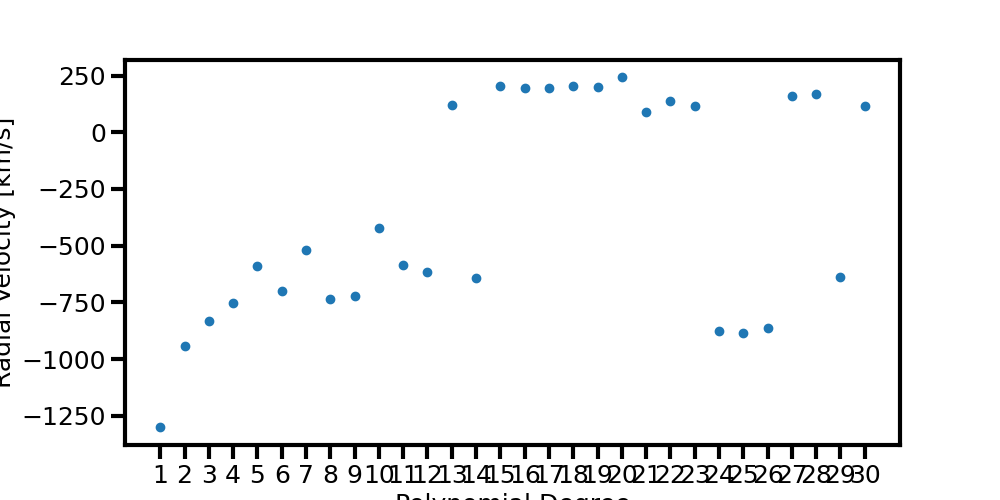

In [5]:
""" User inputs """
ppxf_file = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/NGC_247/10P/obj1/mean_NCS.fits' # path to ppxf input file
fwhm_gal = 5000 / 1800 # instrument resolution
min_degrees, max_degrees = 1, 30 # min and max degrees for Legendre polynomials

degrees = np.arange(min_degrees, max_degrees+1) # make a list of numbers to test for degree
velocities = []
for deg in tqdm(degrees):
    vel, sigma, h3, h4 = ppxf_kinematics(ppxf_file, fwhm_gal, deg)
    clear_output(wait=True)
    velocities.append(vel)
plt.close()

plt.figure(figsize=(10, 5))
plt.scatter(degrees, velocities)
plt.xlabel("Polynomial Degree")
plt.ylabel("Radial Velocity [km/s]")
plt.xticks(np.arange(min(degrees), max(degrees)+1, 1.0))
plt.show()

### step 4.2 ppxf with best degree

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:       118        92    -0.003    -0.004
chi2/DOF: 829.1; DOF: 1696; degree = 23; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 42; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 1/150
Formal errors:
     dV    dsigma   dh3      dh4
 2.2e+02 3.1e+02     1.9       2
Elapsed time in pPXF: 0.51 s
Best-fitting redshift z = 0.00039 +/- 0.00073
Signal-to-noise ratio per pixel: 0.64
0.0709902014484598 0.1117123713731014


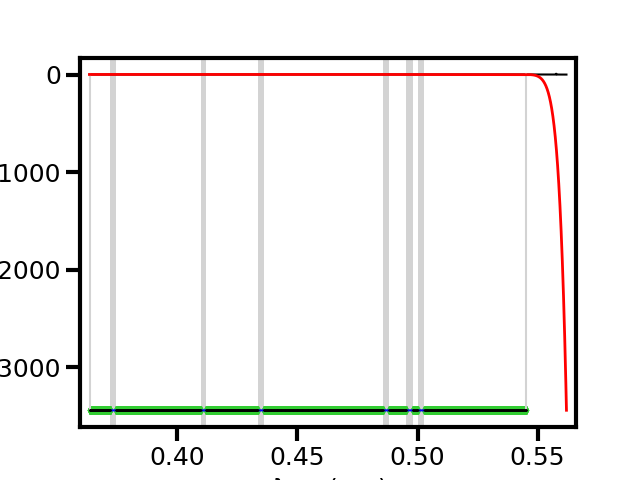

(117.59479327263706,
 92.09468142514353,
 0.00039233094984347794,
 0.0007343772671380799)

In [16]:
""" User inputs """
degree = 23

plt.close()
ppxf_kinematics(ppxf_file, fwhm_gal, degree)